### - Exercici 1
A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.


Exercici 1:

>Es una base de dades SGGAE_Pràctica on la transaccio  de lectura/escriptura
El schema anomenat movies, esta format per cinc taules

* table tb_genre
* table tb_movie
* table tb_role
* table tb_person
* table tb_movie_person


>TAULA tb_genre 

>CREATE TABLE movies.tb_genre (
  genre_id         INTEGER NOT NULL ,                   / identificador de la taula tb_genre  haurà de ser de tipus enter
                                                         y no pot estar buit
                                                         
  >genre_name       CHARACTER VARYING(40) NOT NULL ,     / camp de la taula  correspon al nom del genere de tipus carcter

  >created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' ,
  
  >created_date     DATE , / tipus data
  updated_date     DATE ,
  CONSTRAINT pk_genre PRIMARY KEY (genre_id)            / Es  la clau primaria  genre_id es qui identifica 
                                                        de forma univocament les entitats istancia 
>);
 
  >TAULA tb_movie

>CREATE TABLE movies.tb_movie (
  movie_id         INTEGER NOT NULL ,
  movie_title      CHARACTER VARYING(100) NOT NULL ,  /  tipus de dades caracter de 100
  
 > movie_date       DATE ,
 
  >movie_format     CHARACTER VARYING(50) , / cadenes de de longitut variable  amb un límit fixe (50)
  
  >movie_genre_id   INTEGER ,
  
  >created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' ,
  
  >created_date     DATE ,     / tipus format data
  
  >updated_date     DATE ,
  
  >CONSTRAINT pk_movie PRIMARY KEY (movie_id) ,       /    clau primaria
  
  >CONSTRAINT fk_movie_genre FOREIGN KEY (movie_genre_id) REFERENCES movies.tb_genre (genre_id)
  
  >  relaciona la taula  tb_movie (entitat feble) amb la taula tb_genre( entitat forta) el genre_id  (identificador) de la taula tb_genre conecta amb la taula tb_movie amb la clau forana FK es movie_genre_id  
la conectivitat entre les taules es N:1 (  taula tb_movie N i la taula_genre es 1)


 >TAULA tb_role

>CREATE TABLE movies.tb_role (

 > role_id          INTEGER NOT NULL , 
 
 > role_name        CHARACTER VARYING(60) NOT NULL ,
 
  > created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' ,
  
  >created_date     DATE ,
  
  >updated_date     DATE ,
  
  >CONSTRAINT pk_role PRIMARY KEY (role_id)                              /  clau primaria 

>);

>Aquesta taula  tb_role (Forta) (1)  esta relacionada amb tb_movie_person (feble) (N) amb una conectivitat de 1:N

>TAULLA tb_person 

>CREATE TABLE movies.tb_person (
  person_id        INTEGER NOT NULL ,
  person_name      CHARACTER VARYING(100) NOT NULL ,
  person_country   CHARACTER VARYING(40) , 
  person_dob       DATE NOT NULL ,
  
 > person_dod       DATE ,             /  es possible que  no hi hagi data de defunció
 
  >person_parent_id INTEGER ,          
  created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' ,
  created_date     DATE ,
  updated_date     DATE ,
  
  >CONSTRAINT pk_person PRIMARY KEY (person_id) ,   /clau primaria 
  
  >CONSTRAINT fk_person_parent FOREIGN KEY (person_parent_id) REFERENCES movies.tb_person (person_id)
                                    /conectivitat  1:N   entre person_id  i person_parent_id entre la mateixa taula
);


>TAULA tb_movie_person
	 

CREATE TABLE movies.tb_movie_person (
  movie_id         INTEGER NOT NULL ,
  person_id        INTEGER NOT NULL ,
  role_id          INTEGER NOT NULL ,
  movie_award_ind  CHAR(1) NOT NULL ,
  created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' ,
  created_date     DATE ,
  updated_date     DATE ,
  
  >CONSTRAINT pk_movper PRIMARY KEY (movie_id, person_id, role_id) ,
  
   > / clau primaria  formada per un conjunt d´atributs 3 en aquest cas que son
     /(movie_id, person_id, role_id) així sabem que no hi ha dos iguals

  >CONSTRAINT fk_movper_movie FOREIGN KEY (movie_id) REFERENCES movies.tb_movie (movie_id) ,     / conectivitat 1:N tb_movie (forta )1 i tb_movie_person (feble) N
  
  >CONSTRAINT fk_movper_person FOREIGN KEY (person_id) REFERENCES movies.tb_person (person_id) ,   / conectivitat 1:N tb_person (forta )1 i tb_movie_person (feble) N
  
  >CONSTRAINT fk_movper_role FOREIGN KEY (role_id) REFERENCES movies.tb_role (role_id)  ,         / conectivitat  1:N tb_role (forta )1 i tb_movie_person (feble) N
>);
	 

1:N Un registre dúna taula feble o(secundaria) només  pot estar relacionat  amb un unic registre de laltre taula forta o (principal) i un registre de la taula principal pot tenir més d un registre relacionat en la taula secundaria, es la relacio mes habitual



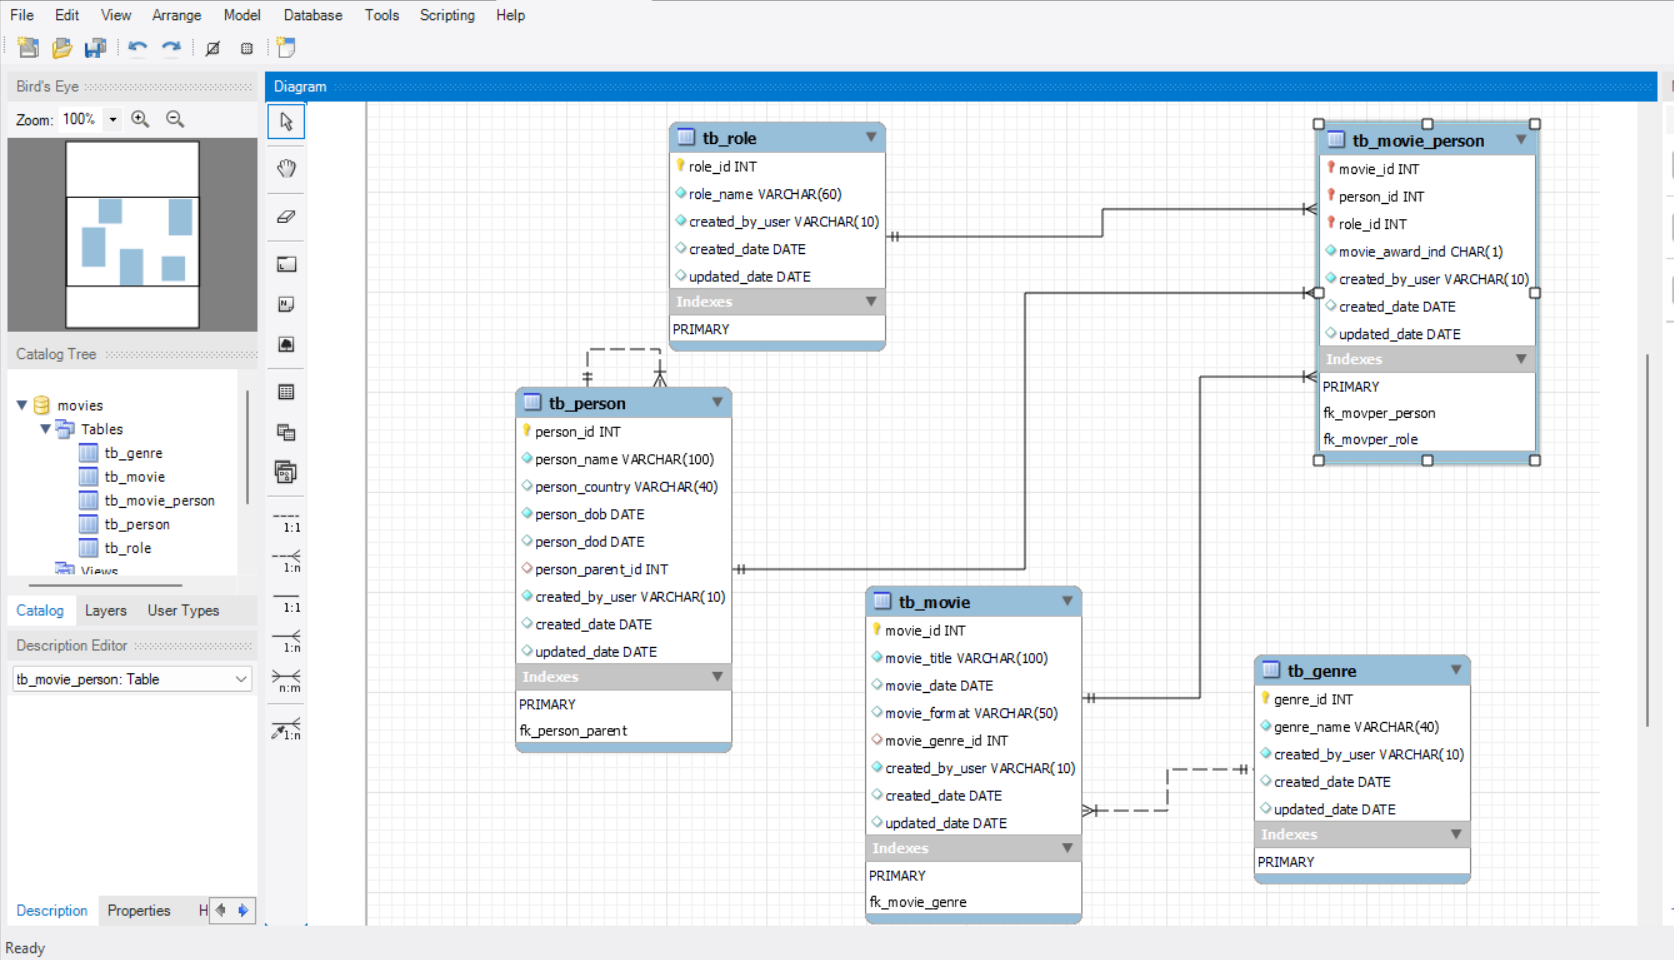

### Exercici 2
select person_name, person_country,person_dob from movies.tb_person  where person_dod is null order by person_dob asc


### Exercici 3

select genre_name, count(m.movie_title) as total

from movies.tb_genre as g left join movies.tb_movie as m on m.movie_genre_id = g.genre_id

group by g.genre_id

order by total desc;


### Exercici 4


### Exercici 5

insert into movies.tb_genre( genre_name, genre_id)

values("Documental",69);


 ### Exercici 6
 
 delete from movies.tb_movie_person 
 
 where movie_id=(select movie_id from movies.tb_movie where movie_title = "La Gran Familia Española");
 
delete from movies.tb_movie where movie_title = "La Gran Familia Española";
 